In [12]:
import numpy as np
import pandas as pd 
from scipy.stats import geom, expon
import matplotlib.pyplot as plt
import seaborn as sns

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08]


Text(0, 0.5, 'Probability of getting success')

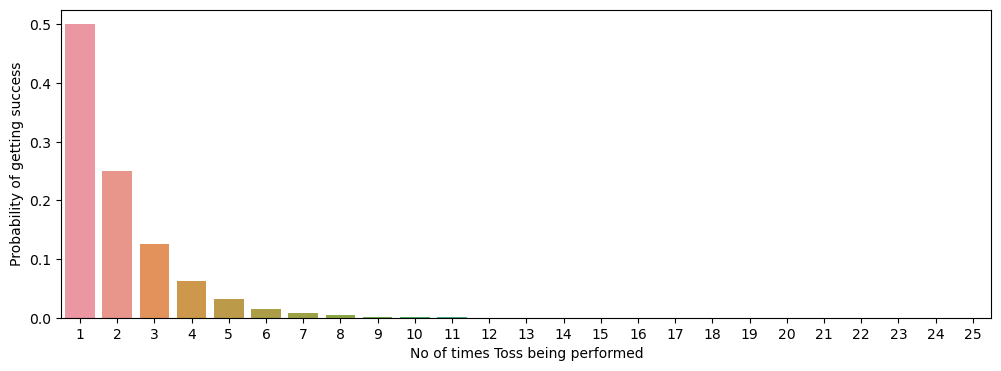

In [15]:

"""

  Experiment 1: Flipping a coin till we get the first "Heads"

  In this case, "success" implies getting the outcome as "Heads".
  We stop the game as soon as we see the first success.

  What is the probability of success in each trial? p = 1/2

  When we run the experiment, it may take "k" trials to see the first success,
  where k is a random variable which can have values of {1, 2, 3, 4, 5, ..... to infinity}

  Let us find the probability for each of these: k = 1, k = 2, k = 3, and so on...

"""

n=25 

p=0.5

x=[]
y=[]

for i in range(1, n+1): 
    
    x.append(i)
    y.append(geom.pmf(k=i, p=0.5))

print(x)
print(y)

plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=y)
plt.xlabel("No of times Toss being performed")
plt.ylabel("Probability of getting success")


In [16]:

#is there a way to find the probability at any particular value of "k"?

#Yes, since we know this is a geometric distribution for p = ,
#We can find the pmf of the distribution at any desired value of

geom.pmf(k=5, p=0.5)


0.03125

Finding the probability for any specific value of "<= k"

In [17]:
geom.cdf(k=5, p=0.5)

0.96875

You are flipping a biased coin with a 30% chance of getting heads until you succeed.
What is the probability of getting heads on the 2nd flip?

In [18]:
p=0.3
k=2
geom.pmf(k=k, p=p)

0.21

In [23]:

"""
In a factory that produces light bulbs,
there's a 5% chance that any given bulb is defective.

What is the probability of needing 1 or 2 bulbs
to find the first defective bulb?
"""

p=0.05
k=2
geom.cdf(k=k,p=p)



0.0975

In [24]:
geom.pmf(k=1,p=p)+geom.pmf(k=2,p=p)+geom.pmf(k=0,p=p)

0.0975

<Axes: xlabel='No of times dice throw to get success------>', ylabel='Success'>

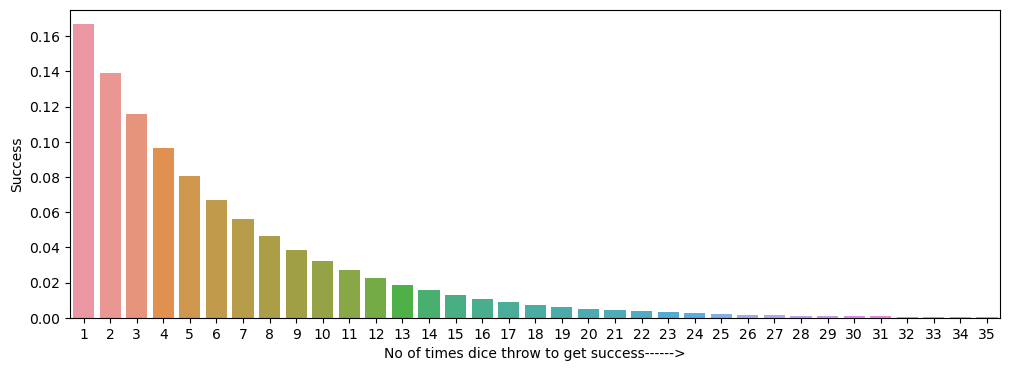

In [25]:

"""

  Experiment 2: Rolling a die till we get the first "SIX"

  In this case, "success" implies getting the outcome as "SIX".
  We stop the game as soon as we see the first success.

  What is the probability of success in each trial? p = 1/6

  When we run the experiment, it may take "k" trials to see the first success,
  where k is a random variable which can have values of {1, 2, 3, 4, 5, ..... to infinity}

  Let us find the probability for each of these: k = 1, k = 2, k = 3, and so on...

"""

p=1/6
n=35

x=[]
y=[]
for i in range(1, n+1): 
    x.append(i)
    y.append(geom.pmf(k=i, p=p))
    
plt.figure(figsize=(12,4))
plt.xlabel("No of times dice throw to get success------>")
plt.ylabel("Success")
sns.barplot(x=x, y=y)

In [26]:

#SUCCESS: getting a "SIX"


p = 1/6  #prob of success in any turn

k = 2 #at second turn

geom.pmf(k = k, p = p)



0.1388888888888889

Expected or avg no of times we should do the trail before first success=1/p

In [28]:
p=0.5
print('For toss:', 1/p)

For toss: 2.0


In [29]:
p=1/6
print('For toss:', 1/p)

For toss: 6.0


Geometric Distribution

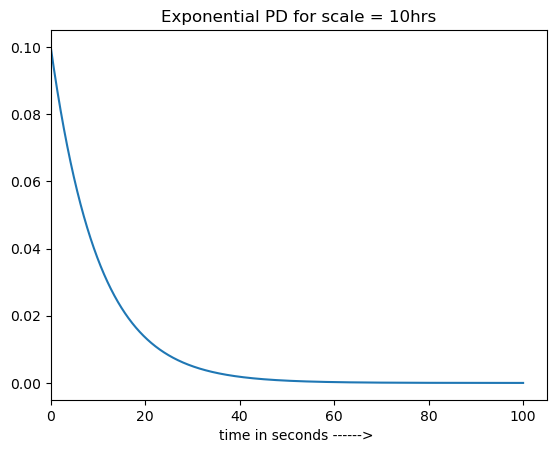

In [32]:

"""
  I have an office phone with a business whatsapp number.
  On average, I get a message every 10 seconds (assume poisson distribution)

  If I suddenly pick up this phone during normal working hours,
  how long do I have to wait for the "next" new message?
"""


#expected waiting time for the next message: 10s

scale = 10

#Plotting for a given value of "scale"

#scale = 50 #average wait time for next success

time_array = np.linspace(0,scale*10,100000)

x_values = []
for x in time_array:
  x_values.append((1/scale) * np.exp(-x * (1/scale)))

plt.plot(time_array,x_values)
plt.title(f"Exponential PD for scale = {scale}hrs")
plt.xlabel("time in seconds ------> ")
plt.xlim(0)
plt.show()

In [33]:

"""
  I have an office phone with a business whatsapp number.
  On average, I get a message every 10 seconds (assume poisson distribution)

  If I suddenly pick up this phone during normal working hours,
  what is the probability that I will get a new message in the next 20 seconds?
"""

time_end_value = 20
scale_avg = 10

expon.cdf(x = time_end_value, scale = scale_avg)


0.8646647167633873

In [34]:
"""
Suppose you have a system that fails, on average, every 50 hours (x-axis units as "hours" instead of "seconds").
What is the probability that the system will fail within the first 20 hours?

"""

scale_avg=50
end_value=20
expon.cdf(x=end_value, scale=scale_avg)

0.3296799539643607

In [43]:

"""
  I have an office phone with a business whatsapp number.

  If the poisson rate of getting new messages is 0.067 messages per second,


  what is the probability that I need to wait >10 seconds
  for the next message
"""


scale_avg=0.067*10

time_end=10

1-expon.cdf(x=time_end, scale=scale_avg)

3.296042533351695e-07

In [44]:


"""
  I have an office phone with a business whatsapp number.
  If the expected wait time for the next message is 15 seconds (assume poisson),

  what is the probability that I need to wait between 14 and 18 seconds
  for the next message?
"""

scale_avg=15

time_end1=18
time_end2=14

expon.cdf(x=time_end1, scale=scale_avg)-expon.cdf(x=time_end2, scale=scale_avg)

0.09204650895639599

In [51]:

"""
  Imagine you are are a call center.
  You find one of the phones (seats) vacant. So you go and get wired.
  The average waiting time for a call is 5 minutes


  (1) What is the probabilty that you have to wait >6 minutes
      for the next call?


  (2) Let's say you waited 3 minutes (and there was no call received).
      Given this info, what the prob that you have to wait a total
      of >9 mins for your call(memory less property in expon)

"""

scale_avg=5
time_end=6

#1. 

1-expon.cdf(x=time_end, scale=scale_avg)




0.3011942119122022

In [49]:
1-expon.cdf(x=9, scale=scale_avg)

0.16529888822158656

In [50]:
1-expon.cdf(x=3, scale=scale_avg)

0.5488116360940265

In [53]:
(1-expon.cdf(x=9, scale=scale_avg))/(1-expon.cdf(x=3, scale=scale_avg))

0.3011942119122021

# Assignment Questions: 
    

In [55]:
"""As a data analyst at Global Mariotech, one of your prime duties is to understand customer sentiments and provide a better experience to the customers.

Based on a recent survey, it was found that there were 30% negative responses, and 70% positive.

Assuming that we pick one response after another randomly, estimate the number of feedbacks to expect, before a negative feedback appears."""


p=0.3
q=0.7

feedback_expected=1/0.3
feedback_expected




3.3333333333333335

In [58]:
"""You are hired as a data scientist for the company SellMart.

Your first task is to analyze the durations of customer support call.

On an average, a customer care executive takes about 5 minutes to solve the issue of any customer. It is known that the time taken follows an exponential distribution.

Find the probability that an executive spends 4 to 5 minutes with any randomly selected customer."""


scale_avg=5

time_end1=5
time_end2=4

expon.cdf(x=time_end1, scale=scale_avg)-expon.cdf(x=time_end2, scale=scale_avg)


0.08144952294577923

In [66]:
"""A new pair of running shoes of Brank X are known to last 6 months, on an average, assuming that they are used every day.

It is known that the duration of their lifespan follows exponential distributed.

If a pair has already lasted 5 months, find the probability that it will last a total of over 9 months."""

scale_avg=6

time_end1=9

time_end2=5

1-(expon.cdf(x=time_end1-time_end2, scale=scale_avg))

0.513417119032592

In [68]:
1/0.75

1.3333333333333333

"""For a certain railway agency, 
the number of days people book their rail ticket in advance can be modeled by an exponential distribution, 
with the average amount of time to be 4 days. 
Based on this data, how many days in advance do 75% of all travelers book tickets?"""

Correct Option: 5.5 days

Explanation:
Given μ = 4 days
So, λ = 1/4 = 0.25


We need to find the number of days that 75% of people book their ticket in advance. So basically, we need to find the 75th percentile value of the given distribution.

Another way of looking at this is that for k days, P(X < k) = 0.75
Hence, we can apply the CDF formula for Exponential distribution to calculate the value of k

Using CDF of exponential distribution,
P(X < k) = 1 - e(-k / μ)
=> 0.75 = 1 - e(-k/4)
=> e(-0.25k) = 1-0.75 = 0.25
=> ln(e(-0.25k)) = ln(0.25)
=> -0.25k = -1.386
=> k = 1.386/0.25
=> k = 5.5

Hence, 75% of all travelers book tickets 5.5 days in advance



In [83]:
"""The amount of money customers spend in one trip to the supermarket follows an exponential distribution with a mean amount of Rs 1000.

If a customer has Rs 600 in the wallet, what is the probability that the customer will need more money?

Note: Round the output up to 2 decimal places."""


scale_avg=1000
time_end1=600

round((1-expon.cdf(x=time_end1, scale=scale_avg)),2)


0.55

In [86]:
"""Suppose that the lifespan of an electronic gadget (in years) follows an exponential distribution. 
The average life span of an Electronic Gadget is known to be 2 years.

Find the probability that :

i) It will work for at least 6 years.

ii) It will work for at most 6 years.

Note: Round the output up to 2 decimal places."""

scale=2
time_end=6

round(1-expon.cdf(x=time_end, scale=scale),2)

0.05

In [87]:
expon.cdf(x=time_end, scale=scale)

0.950212931632136